# Name: V Raghav Anand

# Register Number: 19BCE1415

# Machine Learning Lab (CSE4020)

# Faculty: Prof. Abdul Quadir MD

# HARDCODING PERCEPTRON CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem statement: Classifying the person as to whether he/she might get a stroke or not

In [2]:
dataset=pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,1,Yes
1,51676,2,61.0,0,0,1,5,2,202.21,30.0,2,Yes
2,31112,1,80.0,0,1,1,1,2,105.92,32.5,2,Yes
3,60182,2,49.0,0,0,1,1,1,171.23,34.4,3,Yes
4,1665,2,79.0,1,0,1,5,2,174.12,24.0,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,2,80.0,1,0,1,1,1,83.75,30.0,2,No
5106,44873,2,81.0,0,0,1,5,1,125.20,40.0,2,No
5107,19723,2,35.0,0,0,1,5,2,82.99,30.6,2,No
5108,37544,1,51.0,0,0,1,1,2,166.29,25.6,1,No


### Analysis of the dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  Stroke             5110 non-null   object 
dtypes: float64(3), int64(8), object(1)
memory usage: 479.2+ KB


In [4]:
dataset.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,1.586301,43.226614,0.097456,0.054012,0.656164,2.045597,1.491977,106.147677,28.936771,2.585519
std,21161.721625,0.492941,22.612647,0.296607,0.226063,0.475034,1.469357,0.499985,45.283560,7.701024,1.092522
min,67.000000,1.000000,0.080000,0.000000,0.000000,0.000000,1.000000,1.000000,55.120000,10.300000,1.000000
25%,17741.250000,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,77.245000,23.800000,2.000000
50%,36932.000000,2.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.885000,28.400000,2.000000
75%,54682.000000,2.000000,61.000000,0.000000,0.000000,1.000000,3.000000,2.000000,114.090000,32.800000,4.000000
max,72940.000000,3.000000,82.000000,1.000000,1.000000,1.000000,5.000000,2.000000,271.740000,97.600000,4.000000


### Dropping off the unnecessary column

In [5]:
dataset.drop("id", axis=1, inplace=True)

In [6]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,Yes
1,2,61.0,0,0,1,5,2,202.21,30.0,2,Yes
2,1,80.0,0,1,1,1,2,105.92,32.5,2,Yes
3,2,49.0,0,0,1,1,1,171.23,34.4,3,Yes
4,2,79.0,1,0,1,5,2,174.12,24.0,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,1,0,1,1,1,83.75,30.0,2,No
5106,2,81.0,0,0,1,5,1,125.20,40.0,2,No
5107,2,35.0,0,0,1,5,2,82.99,30.6,2,No
5108,1,51.0,0,0,1,1,2,166.29,25.6,1,No


### Replacing categorical variables into integers in the target column (Stroke)

In [7]:
dataset.Stroke.replace(("Yes","No"),(1,0),inplace=True)

In [8]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,2,61.0,0,0,1,5,2,202.21,30.0,2,1
2,1,80.0,0,1,1,1,2,105.92,32.5,2,1
3,2,49.0,0,0,1,1,1,171.23,34.4,3,1
4,2,79.0,1,0,1,5,2,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,1,0,1,1,1,83.75,30.0,2,0
5106,2,81.0,0,0,1,5,1,125.20,40.0,2,0
5107,2,35.0,0,0,1,5,2,82.99,30.6,2,0
5108,1,51.0,0,0,1,1,2,166.29,25.6,1,0


### Pairplot analysis

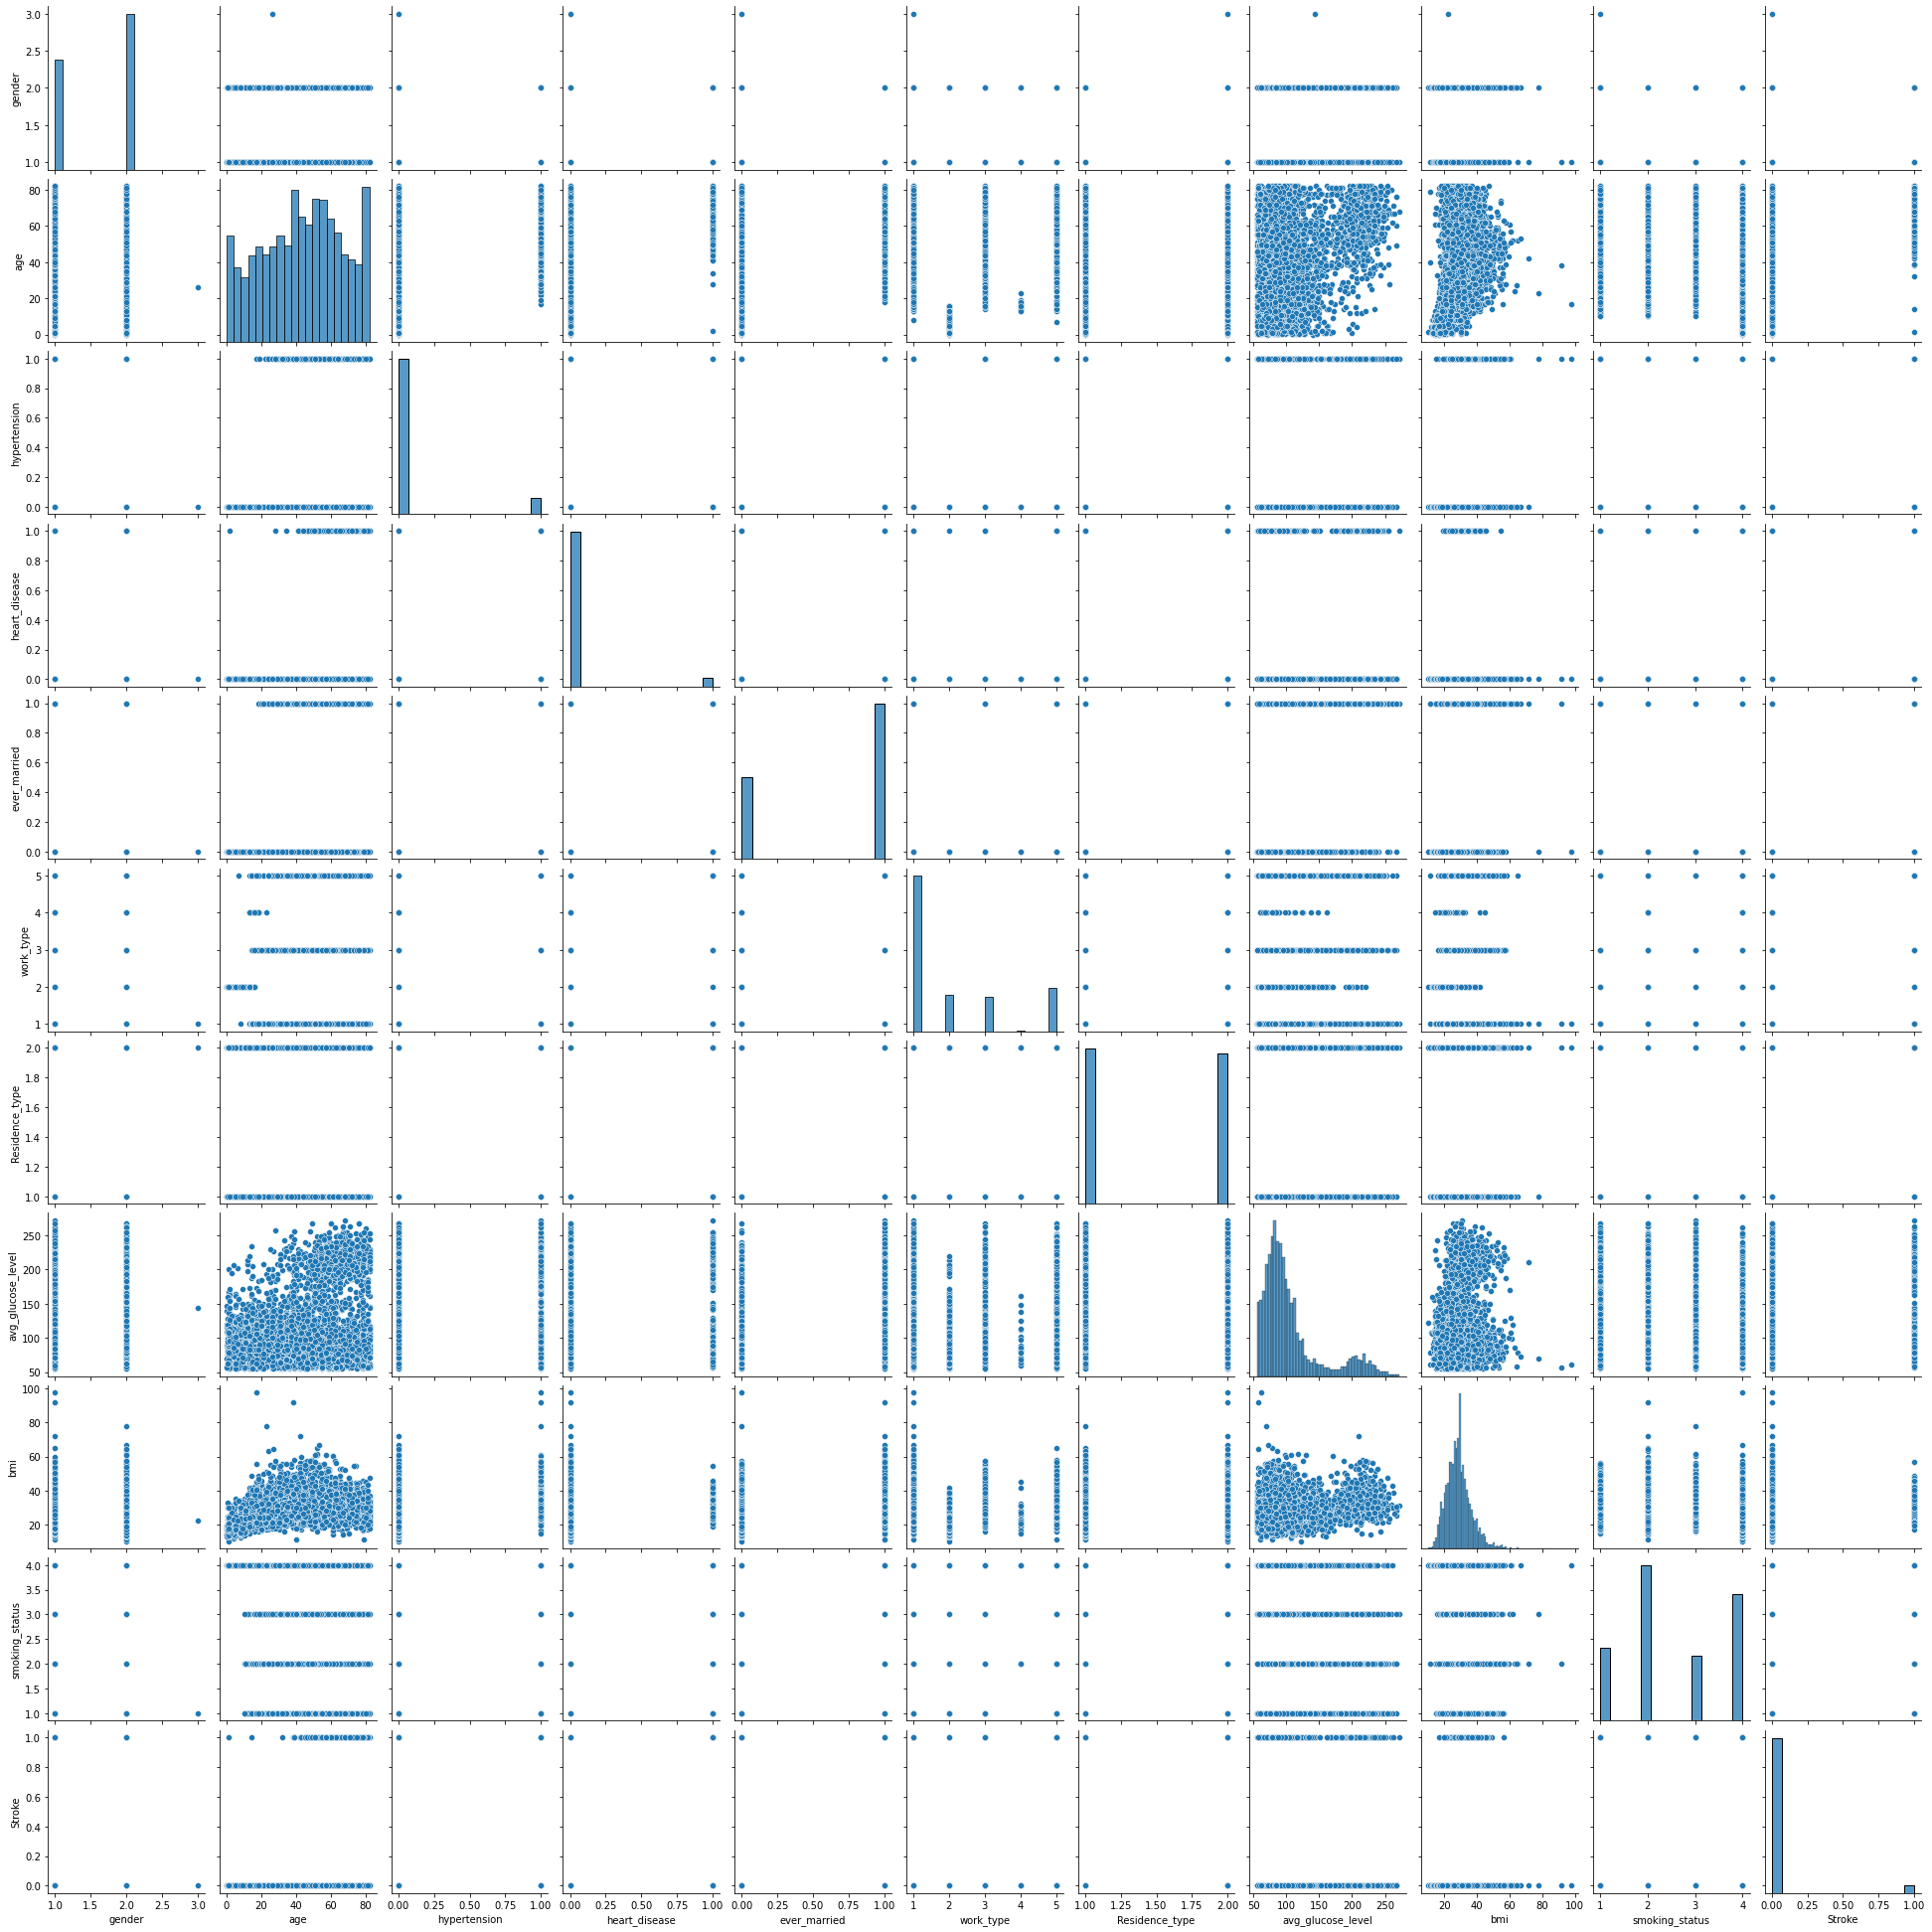

In [9]:
import seaborn as sb
sb.pairplot(dataset)

### Defining a hardcoded algorithm for building the perceptron classifier

In [10]:
def accuracy(a, p):
    correct=0
    for i in range(len(a)):
        if(a[i]==p[i]):
            correct+=1
    return correct/len(a)
def perceptron(data, num_iter):
    misclassified_ = [] 
    features = data[:, :-1]
    labels = data[:, -1]
    w = np.zeros(shape=(1, features.shape[1]+1))
    predicted = []
  
    for epoch in range(num_iter):
        misclassified = 0
        predicted_epoch = []
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            if (y > 0):
                target = 1.0 
            else:
                target = 0.0
            
            delta = (label.item(0,0) - target)
            predicted_epoch.append(target)
            if(delta):
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
        predicted.append(predicted_epoch)
    return (w, misclassified_, predicted)

### Setting the maximum number of iterations as 15

In [11]:
dataset = np.asmatrix(dataset, dtype = 'float64')
max_iterations = 15 
w, misclassified_, prediction = perceptron(dataset, max_iterations)

### Visual analysis of the iterations and seeing the missclassified values

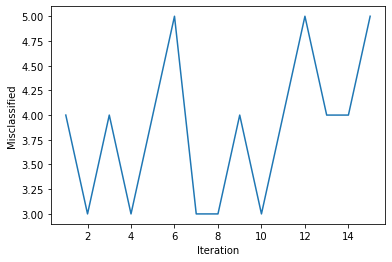

In [12]:
epochs = np.arange(1, max_iterations+1)
plt.plot(epochs, misclassified_)
plt.xlabel('Iteration')
plt.ylabel('Misclassified')
plt.show()

### Seeing the weights of each attribute

In [13]:
print("The weights are :")
for i in range(len(w[0])):
    print("Attribute " + str(i) + " = " + str(w[0][i]))

The weights are :
Attribute 0 = -20.0
Attribute 1 = -23.0
Attribute 2 = -20.0
Attribute 3 = -14.0
Attribute 4 = 12.0
Attribute 5 = 0.0
Attribute 6 = -38.0
Attribute 7 = -35.0
Attribute 8 = -214.54000000000002
Attribute 9 = -364.49999999999994
Attribute 10 = -96.0


In [14]:
expected_d = dataset[:, -1]
expected = []
for i in range(len(expected_d)):
    expected.append(int(expected_d[i]))
expected

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,


### Seeing the accuracy of each epoch

In [15]:
for i in range(max_iterations):
    predicted = prediction[i]
    print("Epoch " + str(i+1)+ " Accuracy = " + str(accuracy(predicted, expected)))

Epoch 1 Accuracy = 0.9992172211350293
Epoch 2 Accuracy = 0.999412915851272
Epoch 3 Accuracy = 0.9992172211350293
Epoch 4 Accuracy = 0.999412915851272
Epoch 5 Accuracy = 0.9992172211350293
Epoch 6 Accuracy = 0.9990215264187867
Epoch 7 Accuracy = 0.999412915851272
Epoch 8 Accuracy = 0.999412915851272
Epoch 9 Accuracy = 0.9992172211350293
Epoch 10 Accuracy = 0.999412915851272
Epoch 11 Accuracy = 0.9992172211350293
Epoch 12 Accuracy = 0.9990215264187867
Epoch 13 Accuracy = 0.9992172211350293
Epoch 14 Accuracy = 0.9992172211350293
Epoch 15 Accuracy = 0.9990215264187867


### Using sklearn package to build the perceptron classifier

In [16]:
from sklearn.linear_model import Perceptron

In [17]:
X = dataset[:, :-1]
y = dataset[:, -1]
model = Perceptron(random_state=1)
model.fit(X, np.array(y))
predicted = model.predict(X)

C:\Users\Raghav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Printing the accuracy matrix and the accuracy of the obtained model

In [18]:
def confusion_matrix(predicted, actual):
    confusion = [[0,0],[0,0]]
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            if predicted[i] == 0:
                confusion[1][1]+=1
            else:
                confusion[0][0]+=1
        else:
            if predicted[i] == 0:
                confusion[0][1]+=1
            else:
                confusion[1][0]+=1
    return confusion

In [19]:
results = confusion_matrix(y, predicted)
expected = []
for i in range(len(y)):
    expected.append(int(y[i]))
print(results)

[[0, 4], [249, 4857]]


In [20]:
print("Accuracy = " + str(accuracy(predicted, expected)))

Accuracy = 0.9504892367906067
